In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Define the desired number of sides (try changing this value!)
n_sides = 6

# Represent a die by using a numpy array
die = np.array([i for i in range(1, n_sides+1)])

die

array([1, 2, 3, 4, 5, 6])

In [8]:
# Run this cell multiple times (every time you should get a different result at random)
np.random.choice(die)

1

In [10]:
# rolling die 20 times
n_rolls = 20

# Save the result of each roll
rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])

rolls

array([1, 1, 6, 6, 1, 3, 3, 1, 2, 4, 4, 5, 1, 2, 1, 3, 6, 2, 6, 4])

In [12]:
# Compute mean of 20 rolls
m = np.mean(rolls)

# Compute variance of 20 rolls
v = np.var(rolls)

print(f"mean of rolls: {m:.2f}\nvariance of rolls: {v:.2f}")

mean of rolls: 3.10
variance of rolls: 3.49


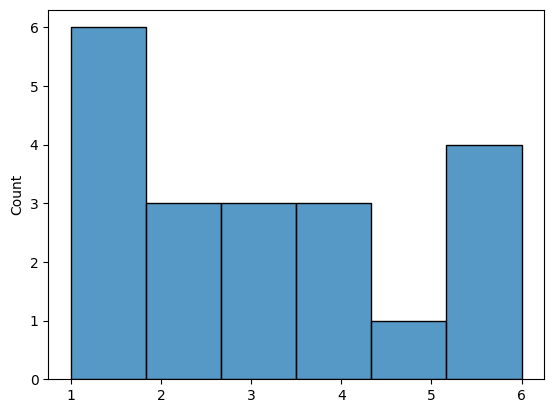

In [14]:
# Display histogram of 20 rolls
sns.histplot(rolls)
plt.show()

mean of rolls: 3.49
variance of rolls: 2.93


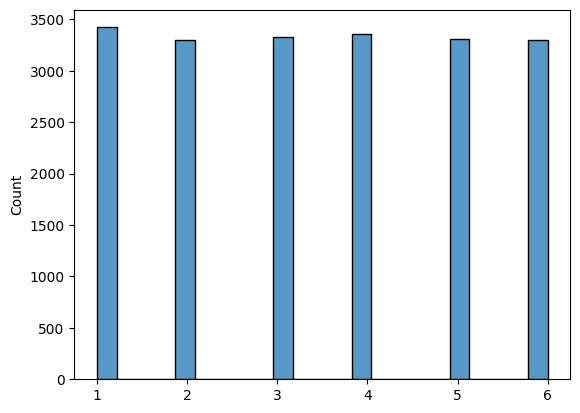

In [18]:
n_rolls = 20_000

rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])

print(f"mean of rolls: {np.mean(rolls):.2f}\nvariance of rolls: {np.var(rolls):.2f}")

sns.histplot(rolls)
plt.show()

mean of first_rolls: 3.50
variance of first_rolls: 2.94

mean of second_rolls: 3.50
variance of second_rolls: 2.96

mean of sum_of_rolls: 7.01
variance of sum_of_rolls: 5.83

covariance between first and second roll:
[[ 2.94012397 -0.03309897]
 [-0.03309897  2.95922634]]


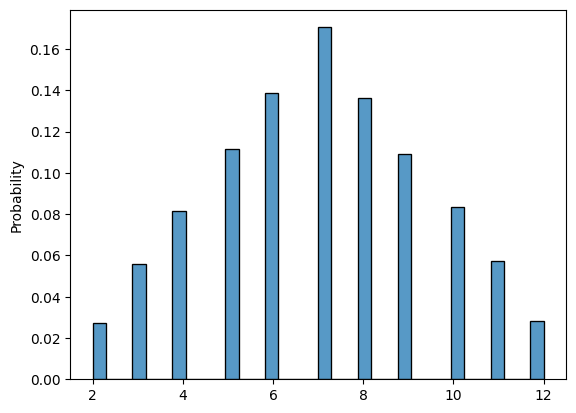

In [19]:
n_rolls = 20_000

# First roll (same as before)
first_rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])

# Second roll (code is the same but saved in a new numpy array)
second_rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])

# Sum both rolls (this is easy since numpy allows vectorization)
sum_of_rolls = first_rolls + second_rolls

# Print mean, variance and covariance
print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
sns.histplot(sum_of_rolls, stat = "probability")
plt.show()

In [21]:
def load_dice(n_sides, loaded_number):
    
    # All probabilities are initially the same
    probs = np.array([1/(n_sides+1) for _ in range(n_sides)])
    
    # Assign the loaded side a probability that is twice as the other ones
    probs[loaded_number-1] = 1 - sum(probs[:-1])
    
    # Check that all probabilities sum up to 1
    if not np.isclose(sum(probs), 1):
        print("All probabilities should add up to 1")
        return
    
    return probs 

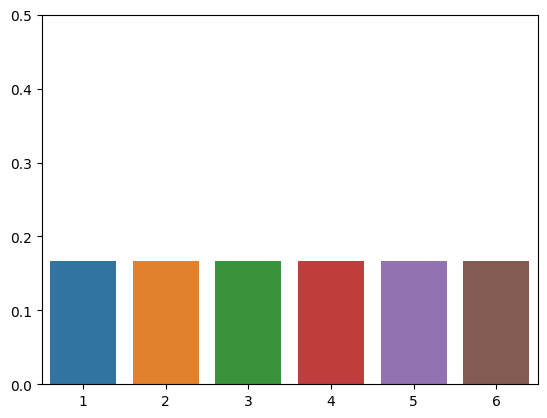

In [23]:
# Compute same probabilities for every side
probs_fair_die = np.array([1/n_sides]*n_sides)

# Plot probabilities
fair_die_sides = sns.barplot(x=die, y=probs_fair_die)
fair_die_sides.set_ylim(0,0.5)
plt.show()

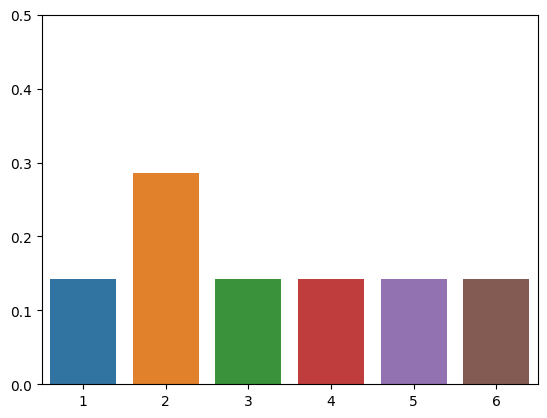

In [25]:
# Get probabilities if die is loaded towards side 2
probs_loaded_die = load_dice(n_sides, loaded_number=2)

# Plot probabilities
loaded_die_sides = sns.barplot(x=die, y=probs_loaded_die)
loaded_die_sides.set_ylim(0,0.5)
plt.show()

mean of first_rolls: 3.29
variance of first_rolls: 2.77

mean of second_rolls: 3.28
variance of second_rolls: 2.76

mean of sum_of_rolls: 6.57
variance of sum_of_rolls: 5.52

covariance between first and second roll:
[[ 2.77001108 -0.00358706]
 [-0.00358706  2.75980295]]


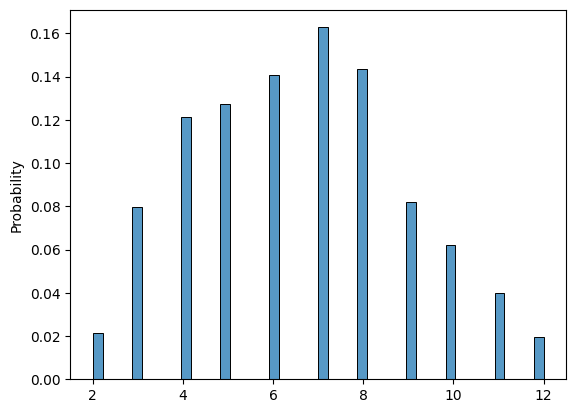

In [27]:
n_rolls = 20_000

# Notice that the p parameter is being set
first_rolls = np.array([np.random.choice(die, p=probs_loaded_die) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(die, p=probs_loaded_die) for _ in range(n_rolls)])

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")


sns.histplot(sum_of_rolls, stat = "probability")
plt.show()

mean of first_rolls: 3.50
variance of first_rolls: 2.92

mean of second_rolls: 1.75
variance of second_rolls: 4.56

mean of sum_of_rolls: 5.25
variance of sum_of_rolls: 12.74

covariance between first and second roll:
[[2.9232461  2.63121954]
 [2.63121954 4.55787428]]


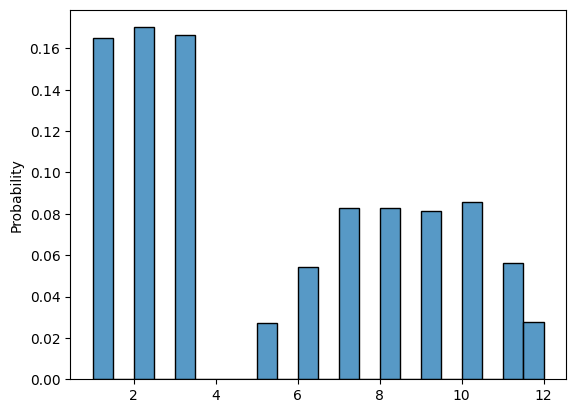

In [28]:
n_rolls = 20_000

first_rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])

# Preserve the result of the second throw only if the first roll was greater or equal to 4
second_rolls = np.where(first_rolls>=4, second_rolls, 0)

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")


sns.histplot(sum_of_rolls, stat = "probability")
plt.show()